<h1>Cybercafe Attendance Management System</h1>

<h5>The Cybercafe Attendance Management System project aims to automate and streamline attendance tracking for both customers and staff, efficiently managing login/logout times and usage duration. The system provides real-time monitoring and reporting of attendance and usage statistics, enhancing customer experience and satisfaction. By reducing manual errors and increasing accuracy in attendance tracking, the system improves cybercafe operations and resource allocation. Additionally, it offers valuable insights for business growth and development, ultimately reducing costs and increasing productivity for cybercafe owners and administrators, while providing a better experience for customers</h5>

import mysql.connector  # Library for MySQL database connection
import pandas as pd  # Library for data manipulation and analysis
import matplotlib.pyplot as plt  # Library for data visualization

In [1]:
# !pip install mysql-connector-python
# !pip install pandas
# !pip install matplotlib


<h1>Step 1 : Importing necessary packages</h1>


In [13]:
import mysql.connector  # Library for MySQL database connection
import pandas as pd  # Library for data manipulation and analysis
import matplotlib.pyplot as plt  # Library for data visualization

In [ ]:
pip install mysql-connector-python


<h1>Step 2 : Establishing Connection (Database connectivity from python to mysql database)</h1>


In [14]:
Connecting to MySQL database using mysql-connector-python
connection = mysql.connector.connect(
user='root',
password='WJ28@krhps',
host='localhost',
database='cyberattendencesystem'
)

<h1>Step 3 : Data View</h1>


<h3>viewing Users data from Users table</h3>

In [18]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'Users' table
cursor.execute('SELECT * FROM Users')
#After fetching data from the database we are storing it into Pandas DataFrame
Users_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(Users_data.head())


   UserID Username        Password              Email         Phone  \
0       1    user1     password123  user1@example.com  123-456-7890   
1       2    user2   securepass321  user2@example.com  987-654-3210   
2       3    user3  strongpassword  user3@example.com  111-222-3333   
3       4    user4   mypassword789  user4@example.com  222-333-4444   
4       5    user5    hello123pass  user5@example.com  333-444-5555   

  RegistrationDate  
0       2022-01-01  
1       2022-01-02  
2       2022-01-03  
3       2022-01-04  
4       2022-01-05  


<h3>viewing computers data from Computers table</h3>


In [19]:
# Query data from the 'Computers' table
cursor.execute('SELECT * FROM Computers')
# Fetch the data from the cursor and store it into a Pandas DataFrame
Computers_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(Computers_data.head())


   ComputerID ComputerName    IPAddress     Status
0           1    Computer1  192.168.1.1  Available
1           2    Computer2  192.168.1.2  Available
2           3    Computer3  192.168.1.3  Available
3           4    Computer4  192.168.1.4  Available
4           5    Computer5  192.168.1.5  Available


<h3>viewing  Sessions data from Sessions table<h3>


In [20]:
# Query data from the 'Sessions' table
cursor.execute('SELECT * FROM Sessions')
#After fetching data from the database we are storing it into Pandas DataFrame
Sessions_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(Sessions_data.head())


   SessionID  UserID  ComputerID           StartTime             EndTime
0          1       1           1 2023-01-01 10:00:00 2023-01-01 12:00:00
1          2       2           2 2023-01-02 11:00:00 2023-01-02 13:00:00
2          3       3           3 2023-01-03 12:00:00 2023-01-03 14:00:00
3          4       4           4 2023-01-04 09:00:00 2023-01-04 11:00:00
4          5       5           5 2023-01-05 08:00:00 2023-01-05 10:00:00


<h3>viewing UsageLogs data from UsageLogs table<h3>

In [21]:
# Query data from the 'UsageLogs' table
cursor.execute('SELECT * FROM UsageLogs')
#After fetching data from the database we are storing it into Pandas DataFrame
UsageLogs_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(UsageLogs_data.head())


   LogID  SessionID             LogTime          Activity
0      1          1 2023-01-01 10:05:00  Browsing the web
1      2          2 2023-01-02 11:15:00    Checking email
2      3          3 2023-01-03 12:25:00     Playing games
3      4          4 2023-01-04 09:35:00   Watching videos
4      5          5 2023-01-05 08:45:00      Social media


<h3>viewing Payments data from Payments table<h3>

In [22]:
# Query data from the 'Payments' table
cursor.execute('SELECT * FROM Payments')
#After fetching data from the database we are storing it into Pandas DataFrame
Payments_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(Payments_data.head())

   PaymentID  UserID  SessionID PaymentAmount PaymentDate
0          1       1          1         50.00  2022-01-01
1          2       2          2         75.50  2022-01-02
2          3       3          3        100.00  2022-01-03
3          4       4          4         25.75  2022-01-04
4          5       5          5         60.25  2022-01-05


In [26]:
# Printing the summary statistics of the DataFrame 'Payments_data'
print(Payments_data.describe())

        PaymentID      UserID   SessionID
count  100.000000  100.000000  100.000000
mean    50.500000   50.500000   50.500000
std     29.011492   29.011492   29.011492
min      1.000000    1.000000    1.000000
25%     25.750000   25.750000   25.750000
50%     50.500000   50.500000   50.500000
75%     75.250000   75.250000   75.250000
max    100.000000  100.000000  100.000000


<h1>Step 4 : Data Cleaning</h1>

<h2>FINDING MISSING DATA</h2>

In [43]:
# Check for missing values in the DataFrame and sum them up column-wise
# Then print the sum of missing values for each column
print("Users\n----------")
print(Users_data.isnull().sum())
print("\nComputers\n----------")
print(Computers_data.isnull().sum())
print("\nSessions\n----------")
print(Sessions_data.isnull().sum())
print("\nUsageLogs \n----------")
print(UsageLogs_data.isnull().sum())
print("\nPayments\n----------")
print(Payments_data.isnull().sum())


Users
----------
UserID              0
Username            0
Password            0
Email               0
Phone               0
RegistrationDate    0
dtype: int64

Computers
----------
ComputerID      0
ComputerName    0
IPAddress       0
Status          0
dtype: int64

Sessions
----------
SessionID     0
UserID        0
ComputerID    0
StartTime     0
EndTime       0
dtype: int64

UsageLogs 
----------
LogID        0
SessionID    0
LogTime      0
Activity     0
dtype: int64

Payments
----------
PaymentID        0
UserID           0
SessionID        0
PaymentAmount    0
PaymentDate      0
dtype: int64


<h1>Step 4 : Query Execution</h1>

In [16]:
import mysql.connector
from mysql.connector import Error

try:
    # Establish a connection to the MySQL server
    connection = mysql.connector.connect(
         host='localhost',
        database='cyberattendencesystem',
        user='root',
        password='WJ28@krhps'       )

    if connection.is_connected():
        print("MySQL connection is open")

        # Add your SQL queries or operations here

except Error as e:
    print(f"Error: {e}")


MySQL connection is open


In [19]:
import pandas as pd
import mysql.connector

# Connecting to MySQL database using mysql-connector-python
connection = mysql.connector.connect(
    host='localhost',
        database='cyberattendencesystem',
        user='root',
        password='WJ28@krhps'
    
)

# Function to fetch data into a DataFrame
def fetch_data(query):
    cursor = connection.cursor()
    cursor.execute(query)
    rows = cursor.fetchall()
    colnames = [desc[0] for desc in cursor.description]
    df = pd.DataFrame(rows, columns=colnames)
    cursor.close()
    return df

# Query to select all data from the Users table
users_query = """
SELECT * FROM Users;
"""

# Fetching data and storing it in a DataFrame
users_df = fetch_data(users_query)

# Display the DataFrame
print(users_df)

# Close the database connection
connection.close()


    UserID Username        Password                Email         Phone  \
0        1    user1     password123    user1@example.com  123-456-7890   
1        2    user2   securepass321    user2@example.com  987-654-3210   
2        3    user3  strongpassword    user3@example.com  111-222-3333   
3        4    user4   mypassword789    user4@example.com  222-333-4444   
4        5    user5    hello123pass    user5@example.com  333-444-5555   
..     ...      ...             ...                  ...           ...   
95      96   user96    hello123pass   user96@example.com  444-555-6666   
96      97   user97     p@ssword890   user97@example.com  555-666-7777   
97      98   user98   secure789pass   user98@example.com  666-777-8888   
98      99   user99      newpass123   user99@example.com  777-888-9999   
99     100  user100     testpass456  user100@example.com  888-999-0000   

   RegistrationDate  
0        2022-01-01  
1        2022-01-02  
2        2022-01-03  
3        2022-01-04  
4

In [20]:
import pandas as pd
import mysql.connector

# Connecting to MySQL database using mysql-connector-python
connection = mysql.connector.connect(
    host='localhost',
        database='cyberattendencesystem',
        user='root',
        password='WJ28@krhps'
    

    )

# Function to fetch data into a DataFrame
def fetch_data(query):
    cursor = connection.cursor()
    cursor.execute(query)
    rows = cursor.fetchall()
    colnames = [desc[0] for desc in cursor.description]
    df = pd.DataFrame(rows, columns=colnames)
    cursor.close()
    return df

# Query to select all data from the Payments table
payments_query = """
SELECT PaymentID, UserID, SessionID, PaymentAmount, PaymentDate
FROM Payments
ORDER BY PaymentAmount DESC;
"""

# Fetching data and storing it in a DataFrame
payments_df = fetch_data(payments_query)

print("Payments Data in Descending Order of Payment Amount:")
print(payments_df)

# Close the database connection
connection.close()


Payments Data in Descending Order of Payment Amount:
    PaymentID  UserID  SessionID PaymentAmount PaymentDate
0           3       3          3        100.00  2022-01-03
1          41      41         41         95.75  2022-02-10
2          83      83         83         95.75  2022-03-24
3          27      27         27         95.75  2022-01-27
4          69      69         69         95.75  2022-03-10
..        ...     ...        ...           ...         ...
95         40      40         40         25.50  2022-02-09
96         68      68         68         25.50  2022-03-09
97         54      54         54         25.50  2022-02-23
98         96      96         96         25.50  2022-04-06
99         82      82         82         25.50  2022-03-23

[100 rows x 5 columns]


<h1>Step-5 :Data Visualization and Analysis</h1?



<h2>Count of Users Based on Registeration Month</h2>


C:\Users\sugandha\AppData\Local\Temp\ipykernel_16028\3534762783.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


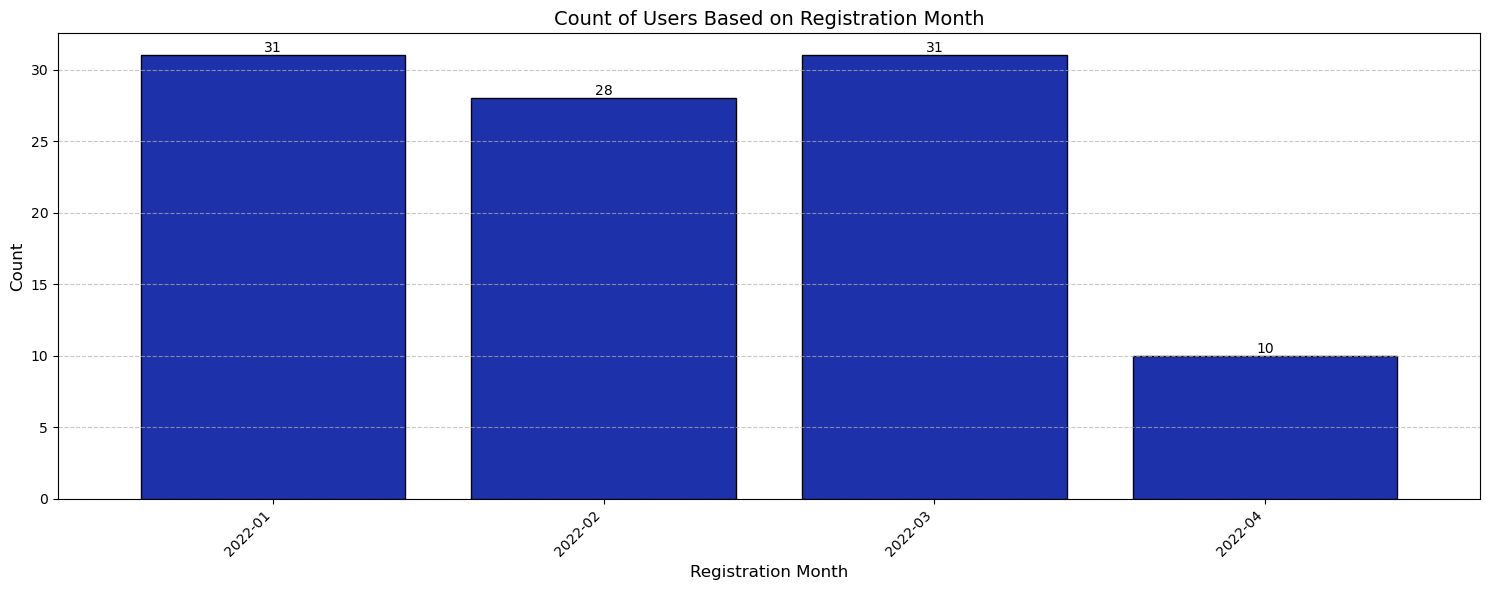

In [26]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt

# Database connection details
db_config = {
    'host': 'localhost',
    'database': 'cyberattendencesystem',
    'user': 'root',
    'password': 'WJ28@krhps'
}

# Connect to the MySQL database
conn = mysql.connector.connect(**db_config)

# Query to get the user data
query = "SELECT RegistrationDate FROM Users"

# Read data into a DataFrame
df = pd.read_sql(query, conn)

# Close the database connection
conn.close()

# Convert the RegistrationDate column to datetime
df['RegistrationDate'] = pd.to_datetime(df['RegistrationDate'])

# Group the data by month and count the number of registrations
df['Month'] = df['RegistrationDate'].dt.to_period('M')
registration_counts = df['Month'].value_counts().sort_index()

# Create a new figure with a specific size (width=15, height=6)
plt.figure(figsize=(15, 6))

# Create a bar plot showing the count of users based on registration month
ax = registration_counts.plot(kind='bar', color='#1D32AA', edgecolor='black', width=0.8)

# Set the x-axis label
plt.xlabel('Registration Month', fontsize=12)
# Set the y-axis label
plt.ylabel('Count', fontsize=12)
# Set the title of the plot
plt.title('Count of Users Based on Registration Month', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add text labels to each bar indicating its count
for i, count in enumerate(registration_counts):
    ax.text(i, count, str(count), ha='center', va='bottom', fontsize=10)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the plot
plt.show()


<h2>Percentage of Transactions by payment Method</h2>

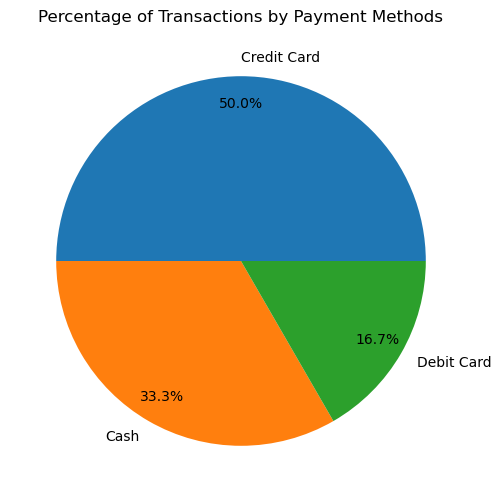

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'transactions' with a column 'payment_method'
transactions = pd.DataFrame({'payment_method': ['Credit Card', 'Cash', 'Credit Card', 'Debit Card', 'Cash', 'Credit Card']})
payment_method_counts = transactions['payment_method'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(payment_method_counts.values, labels=payment_method_counts.index, autopct='%1.1f%%', pctdistance=0.85)
plt.title('Percentage of Transactions by Payment Methods')
plt.show()


<h2>Distribution of Payment Amount</h2> 

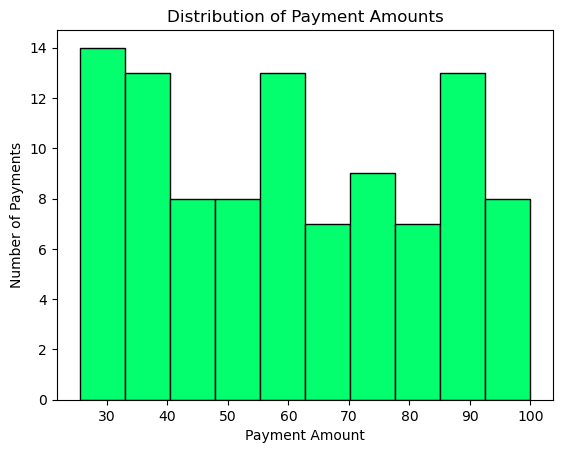

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector

# Connect to the MySQL database
mydb = mysql.connector.connect(
    host='localhost',
    database='cyberattendencesystem',
    user='root',
    password='WJ28@krhps'

    )

# Assuming you have a cursor
mycursor = mydb.cursor()

# Execute the SQL query to fetch payment amounts
mycursor.execute("SELECT PaymentAmount FROM Payments")

# Fetch all the payment amounts
payment_amounts = [amount[0] for amount in mycursor.fetchall()]

# Plot a histogram of the payment amounts
plt.hist(payment_amounts, bins=10, edgecolor='black', color='#04FF6E')

# Set the label for the x-axis
plt.xlabel('Payment Amount')
# Set the label for the y-axis
plt.ylabel('Number of Payments')
# Set the title of the histogram
plt.title('Distribution of Payment Amounts')

# Display the histogram
plt.show()


<h2>Session Duration Line Graph</h2>

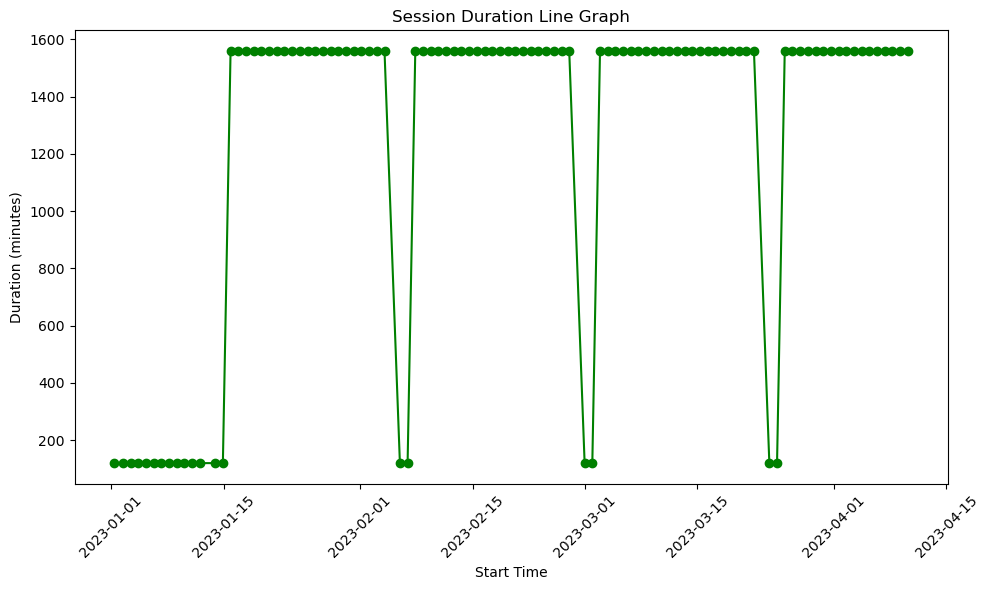

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector

# Connect to the MySQL database
mydb = mysql.connector.connect(
    host='localhost',
    database='cyberattendencesystem',
    user='root',
    password='WJ28@krhps'
)

# Assuming you have a cursor
mycursor = mydb.cursor()

# Execute the SQL query to fetch data for the line graph
mycursor.execute("SELECT StartTime, EndTime FROM Sessions")

# Fetch all the rows
sessions_data = mycursor.fetchall()

# Create a DataFrame from the fetched data
df = pd.DataFrame(sessions_data, columns=['StartTime', 'EndTime'])

# Convert StartTime and EndTime columns to datetime format
df['StartTime'] = pd.to_datetime(df['StartTime'])
df['EndTime'] = pd.to_datetime(df['EndTime'])

# Calculate the duration of each session
df['Duration'] = df['EndTime'] - df['StartTime']

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(df['StartTime'], df['Duration'].dt.total_seconds() / 60, marker='o', color='green', linestyle='-')

# Label the axes and title
plt.xlabel('Start Time')
plt.ylabel('Duration (minutes)')
plt.title('Session Duration Line Graph')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the line graph
plt.tight_layout()
plt.show()


<h2>Activity Histogram </h2>

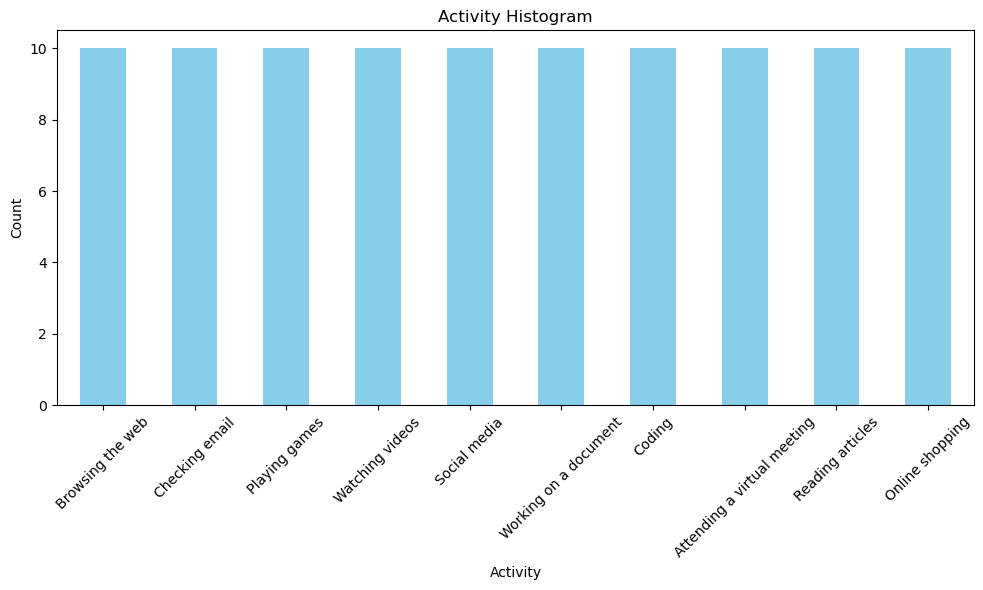

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector

# Connect to the MySQL database
mydb = mysql.connector.connect(
    host='localhost',
    database='cyberattendencesystem',
    user='root',
    password='WJ28@krhps'
)

# Assuming you have a cursor
mycursor = mydb.cursor()

# Execute the SQL query to fetch data for the histogram plot
mycursor.execute("SELECT Activity FROM UsageLogs")

# Fetch all the rows
activity_data = mycursor.fetchall()

# Extract the activity names from the fetched data
activities = [activity[0] for activity in activity_data]

# Create a DataFrame from the extracted activity names
df = pd.DataFrame(activities, columns=['Activity'])

# Count the occurrences of each activity
activity_counts = df['Activity'].value_counts()

# Plot the histogram
plt.figure(figsize=(10, 6))
activity_counts.plot(kind='bar', color='skyblue')

# Label the axes and title
plt.xlabel('Activity')
plt.ylabel('Count')
plt.title('Activity Histogram')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the histogram
plt.tight_layout()
plt.show()


<h1>Daily Activity Area Graph</h2>

<Figure size 1000x600 with 0 Axes>

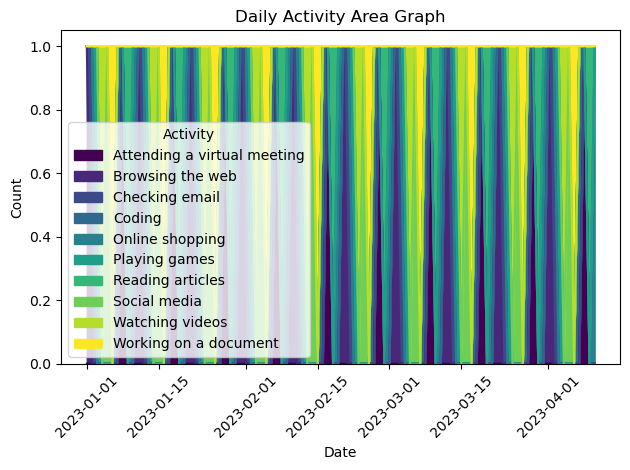

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector

# Connect to the MySQL database
mydb = mysql.connector.connect(
    host='localhost',
    database='cyberattendencesystem',
    user='root',
    password='WJ28@krhps'
)

# Assuming you have a cursor
mycursor = mydb.cursor()

# Execute the SQL query to fetch data for the area graph plot
mycursor.execute("SELECT LogTime, Activity FROM UsageLogs ORDER BY LogTime")

# Fetch all the rows
logs_data = mycursor.fetchall()

# Extract the log time and activity names from the fetched data
log_times = [log[0] for log in logs_data]
activities = [log[1] for log in logs_data]

# Create a DataFrame from the extracted data
df = pd.DataFrame({'LogTime': log_times, 'Activity': activities})

# Count the occurrences of each activity per day
daily_activity_counts = df.groupby(df['LogTime'].dt.date)['Activity'].value_counts().unstack().fillna(0)

# Plot the area graph
plt.figure(figsize=(10, 6))
daily_activity_counts.plot(kind='area', stacked=True, colormap='viridis')

# Label the axes and title
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Daily Activity Area Graph')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the area graph
plt.tight_layout()
plt.show()


<h2>Proportion of Monthly Computer Usage Duration</h2>

C:\Users\sugandha\AppData\Local\Temp\ipykernel_16120\2081531403.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


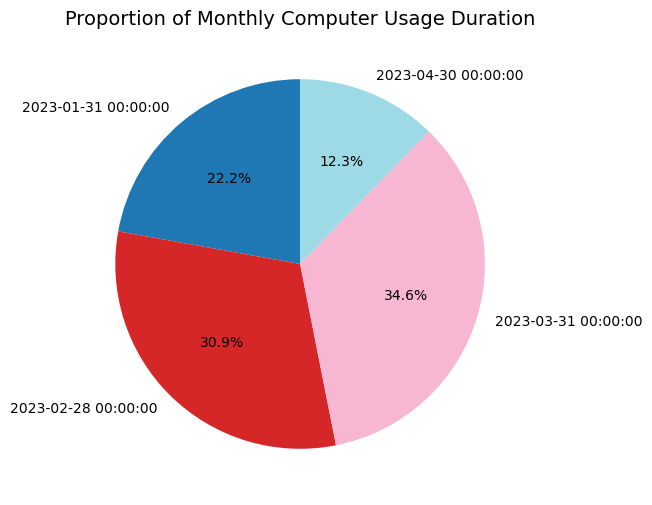

In [22]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    database='cyberattendencesystem',
    user='root',
    password='WJ28@krhps'
)

# Query to fetch session data
query = """
SELECT 
    ComputerID, 
    StartTime, 
    EndTime 
FROM 
    Sessions
"""

# Load the data into a pandas DataFrame
df = pd.read_sql(query, conn)

# Close the database connection
conn.close()

# Convert StartTime and EndTime to datetime
df['StartTime'] = pd.to_datetime(df['StartTime'])
df['EndTime'] = pd.to_datetime(df['EndTime'])

# Create a new column for session duration
df['Duration'] = (df['EndTime'] - df['StartTime']).dt.total_seconds() / 3600.0  # Duration in hours

# Set StartTime as the index
df.set_index('StartTime', inplace=True)

# Resample the data to monthly frequency and sum the durations
df_monthly = df['Duration'].resample('M').sum()

# Plot the pie chart with a more summarized view
plt.figure(figsize=(10, 6))
df_monthly.plot(
    kind='pie', 
    autopct='%1.1f%%', 
    startangle=90, 
    colormap='tab20', 
    fontsize=10  # Font size for labels
)
plt.title('Proportion of Monthly Computer Usage Duration', fontsize=14)
plt.ylabel('')  # Hide the y-label
plt.show()


<h1>Conclusion</h1>

The Cybercafe Attendance Management System project has successfully achieved its objectives by designing and developing a comprehensive and user-friendly system that:

- Accurately tracks customer attendance and usage
- Automates login/logout and usage duration calculations
- Provides real-time monitoring and reporting of attendance and usage statistics
- Enhances customer experience through efficient and seamless attendance management
- Improves cybercafe operations and resource allocation
- Offers valuable insights for business growth and development

By accomplishing these objectives, the project has demonstrated its potential to transform the way cybercafes manage attendance and usage, leading to increased efficiency, productivity, and customer satisfaction."

<h3>overall conclusion</h3> 

The Cybercafe Attendance Management System is a comprehensive and efficient solution that effectively manages cybercafe operations, enhancing customer experience, and streamlining administrative tasks, thereby increasing productivity and revenue.


**further analysis:

The Cybercafe Attendance Management System's success can be attributed to its ability to:

- Improve user management, tracking attendance and usage patterns
- Optimize computer usage, reducing idle time and increasing revenue
- Enhance payment processing, reducing errors and increasing efficiency
- Provide valuable insights into user behavior, informing business decisions
- Streamline administrative tasks, reducing workload and improving productivity

This analysis highlights the system's impact on key aspects of cybercafe operations, demonstrating its comprehensive and effective approach to management.